Nama : Nida Nafila

E-mail : naifanida5858@gmail.com

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile
import os
import requests

In [67]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2023-11-30 05:22:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 20.60.139.65
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|20.60.139.65|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2023-11-30 05:22:22 ERROR 404: The specified resource does not exist..



In [68]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
response = requests.get(url, stream=True)

# Menyimpan file zip
with open("rockpaperscissors.zip", "wb") as handle:
    for data in response.iter_content(chunk_size=1024):
        if data:
            handle.write(data)

# Mengekstrak file zip
with zipfile.ZipFile("rockpaperscissors.zip", "r") as zip_ref:
    zip_ref.extractall("rockpaperscissors")

base_dir = '/content/rockpaperscissors/rockpaperscissors/rps-cv-images'

In [69]:
!sudo apt install tree
!tree -d rockpaperscissors

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
rockpaperscissors
├── __MACOSX
│   └── rockpaperscissors
│       ├── paper
│       ├── rock
│       ├── rps-cv-images
│       │   ├── paper
│       │   ├── rock
│       │   └── scissors
│       └── scissors
├── rockpaperscissors
│   ├── paper
│   ├── rock
│   ├── rps-cv-images
│   │   ├── paper
│   │   ├── rock
│   │   └── scissors
│   └── scissors
└── split
    ├── train
    │   ├── paper
    │   ├── rock
    │   └── scissors
    └── val
        ├── paper
        ├── rock
        └── scissors

26 directories


In [70]:
# Inisialisasi path dataset
base_dir = "rockpaperscissors/split"
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [77]:
# Augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [88]:
# Mempersiapkan data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    batch_size=32,
    class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(100,150),
    batch_size=32,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 148, 16)       448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 49, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 10, 17, 64)       

In [83]:
# Mengcompile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
class CallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      target = .96
      if(logs.get('accuracy') > target and logs.get('val_accuracy') > target):
        print("Akurasi terlampaui!!")

my_callback=CallBack()

In [89]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=15,
      validation_data=val_generator,
      validation_steps=8,
      verbose=2,
      callbacks=[my_callback])

Epoch 1/15
32/32 - 10s - loss: 0.9558 - accuracy: 0.5830 - val_loss: 0.7727 - val_accuracy: 0.6562 - 10s/epoch - 310ms/step
Epoch 2/15
32/32 - 9s - loss: 0.4670 - accuracy: 0.8369 - val_loss: 0.4510 - val_accuracy: 0.8672 - 9s/epoch - 280ms/step
Epoch 3/15
32/32 - 9s - loss: 0.2552 - accuracy: 0.9199 - val_loss: 0.2851 - val_accuracy: 0.8984 - 9s/epoch - 290ms/step
Epoch 4/15
32/32 - 8s - loss: 0.2208 - accuracy: 0.9189 - val_loss: 0.3679 - val_accuracy: 0.8828 - 8s/epoch - 265ms/step
Epoch 5/15
32/32 - 8s - loss: 0.1800 - accuracy: 0.9424 - val_loss: 0.1477 - val_accuracy: 0.9570 - 8s/epoch - 257ms/step
Epoch 6/15
32/32 - 9s - loss: 0.1499 - accuracy: 0.9463 - val_loss: 0.0954 - val_accuracy: 0.9688 - 9s/epoch - 290ms/step
Epoch 7/15
32/32 - 7s - loss: 0.1157 - accuracy: 0.9561 - val_loss: 0.1536 - val_accuracy: 0.9531 - 7s/epoch - 233ms/step
Epoch 8/15
32/32 - 9s - loss: 0.1461 - accuracy: 0.9492 - val_loss: 0.1185 - val_accuracy: 0.9727 - 9s/epoch - 267ms/step
Epoch 9/15
32/32 - 10s

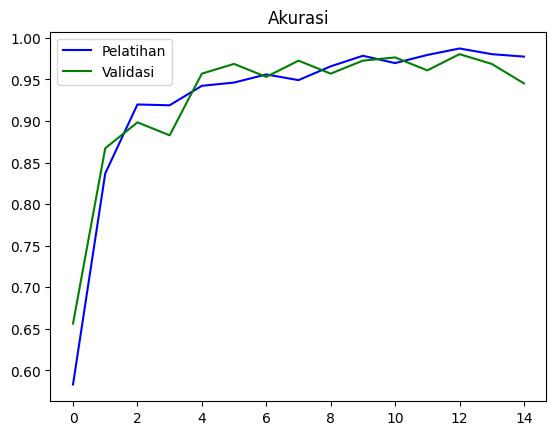

<Figure size 640x480 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Pelatihan')
plt.plot(epochs, validation_accuracy, 'g', label='Validasi')
plt.title('Akurasi')
plt.legend(loc=0)
plt.figure()
plt.show()

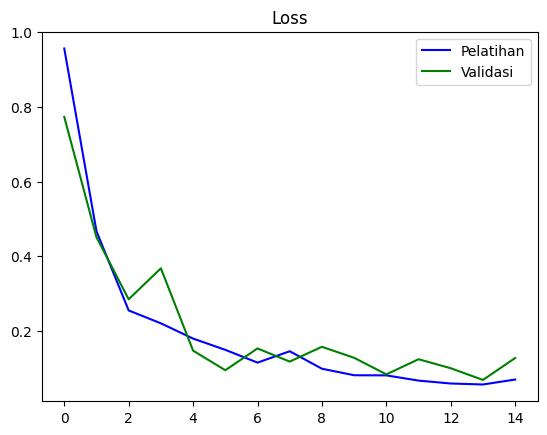

<Figure size 640x480 with 0 Axes>

In [91]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Pelatihan')
plt.plot(epochs, validation_loss, 'g', label='Validasi')
plt.title('Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [92]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving sccr.jpg to sccr (1).jpg
1/1 [==============================] - 0s 157ms/step
sccr (1).jpg
scissors


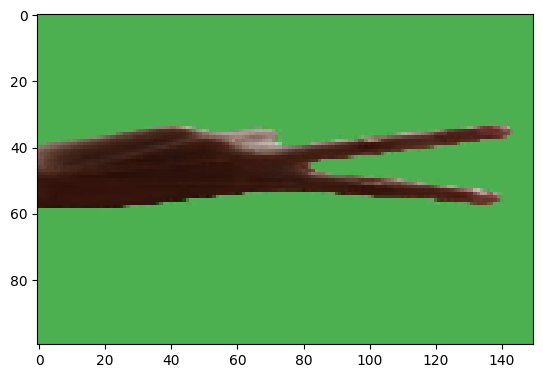

In [93]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

In [ ]:
# Menyimpan model
model.save("rock_paper_scissors_model.h5")
